<a href="https://colab.research.google.com/github/leoalmeida/AI-workspace/blob/main/TrabalhandoComImagens.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Aula 4**

Vídeo 4.1

Saving 1-chatbots.png to 1-chatbots.png


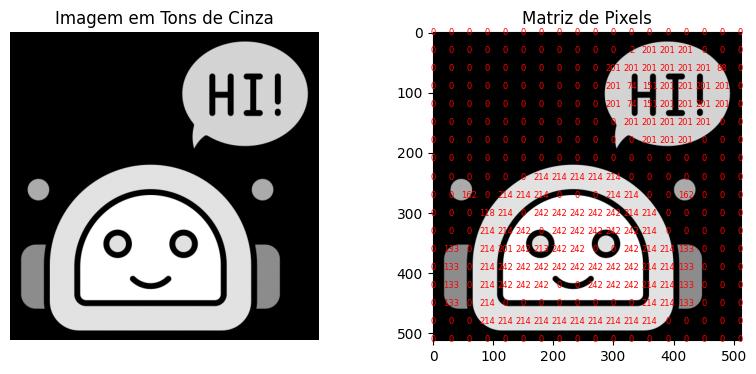

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

# Fazer upload da imagem
uploaded = files.upload()
image_path = list(uploaded.keys())[0]

# Carregar a imagem em escala de cinza
imagem = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Mostrar a imagem original e a matriz correspondente
plt.figure(figsize=(10,4))

plt.subplot(1, 2, 1)
plt.imshow(imagem, cmap="gray")
plt.title("Imagem em Tons de Cinza")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(imagem, cmap="gray")
plt.title("Matriz de Pixels")
for i in range(0, imagem.shape[0], 30):
    for j in range(0, imagem.shape[1], 30):
        plt.text(j, i, str(imagem[i, j]), color="red", fontsize=6, ha='center', va='center')

plt.show()


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Criar um modelo CNN simples
modelo = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(64, 64, 3)),  # Camada convolucional
    MaxPooling2D(pool_size=(2,2)),  # Camada de pooling
    Flatten(),  # Achatar para camada densa
    Dense(128, activation='relu'),  # Camada totalmente conectada
    Dense(3, activation='softmax')  # Saída para 3 classes
])

modelo.summary()  # Exibe a arquitetura da rede

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 30752)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,936,384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,937,667 (15.02 MB)

 Trainable params: 3,937,667 (15.02 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input, decode_predictions
import numpy as np
import cv2
from google.colab import files
from PIL import Image

# Fazer upload da imagem
uploaded = files.upload()
imagem_path = list(uploaded.keys())[0]  # Pega o nome do arquivo enviado

# Carregar a imagem usando OpenCV
imagem = cv2.imread(imagem_path)
imagem_rgb = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)

# Carregar o modelo MobileNetV2 pré-treinado
modelo = MobileNetV2(weights="imagenet")

# Pré-processar a imagem para o formato esperado pelo modelo
imagem_redimensionada = cv2.resize(imagem_rgb, (224, 224))
imagem_array = np.expand_dims(imagem_redimensionada, axis=0)
imagem_array = preprocess_input(imagem_array)

# Fazer a previsão
predicoes = modelo.predict(imagem_array)
label = decode_predictions(predicoes)
print("Objeto identificado:", label[0][0][1])  # Exibe a classe identificada

Saving 1-chatbots.png to 1-chatbots (1).png
14536120/14536120 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Objeto identificado: digital_clock


Vídeo 4.3

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Conjunto de frases
frases = ["Eu amo viajar para o Japão", "Viajar é incrível", "Quero conhecer o Japão"]

# Criando o modelo BoW
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(frases)

# Exibir matriz resultante
print(vectorizer.get_feature_names_out())
print(X.toarray())

['amo' 'conhecer' 'eu' 'incrível' 'japão' 'para' 'quero' 'viajar']
[[1 0 1 0 1 1 0 1]
 [0 0 0 1 0 0 0 1]
 [0 1 0 0 1 0 1 0]]


In [ ]:
from transformers import pipeline

# Carregar um modelo de geração de texto
gerador = pipeline("text-generation", model="gpt2")

# Definir prompt
prompt = "Qual a melhor época para visitar o Japão?"

# Gerar uma resposta ajustando os parâmetros para evitar repetições
resposta = gerador(
    prompt,
    max_length=50,      # Aumentar um pouco o comprimento
    temperature=0.7,    # Controla a aleatoriedade
    top_p=0.9,          # Faz a amostragem com núcleo (nucleus sampling)
    top_k=50,           # Restringe a escolha a top 50 palavras mais prováveis
    repetition_penalty=1.2 # Penaliza repetições
)

# Exibir resposta formatada
print(resposta[0]['generated_text'])

Device set to use cpu
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Qual a melhor época para visitar o Japão?
Tiempo de la vida y percio que lo tanto. La puede diferencias con el música, quier
